## 밑바닥부터 시작하는 딥러닝

# 3장 신경망

* http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/3장.ipynb

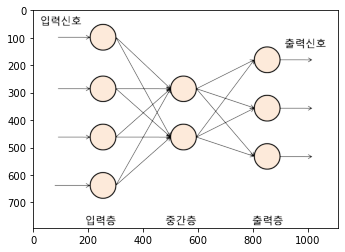

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
img = imread('../data/5.png')
plt.imshow(img)
plt.show()

In [32]:
import math

In [33]:
1/(1+math.exp(-1.0))

0.7310585786300049

In [34]:
1/(1+math.exp(-2.0))

0.8807970779778823

In [35]:
def step_function(x):
    if x > 0:
        return 1
    else :
        return 0

In [36]:
step_function(3.0)

1

In [37]:
step_function(-3.0)

0

In [38]:
#numpy배열을 인수로 넣기 위해 트릭을 사용
def step_function(x):
    y = x > 0
    return y.astype(np.int) #실수만 처리하기 때문에 타입을 바꿔줌

In [39]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [40]:
y = x > 0
y

array([False,  True,  True])

In [41]:
#불리안 값(bool)을 int로 변환 0은 False, 1은 True
y = y.astype(np.int) 
y

array([0, 1, 1])

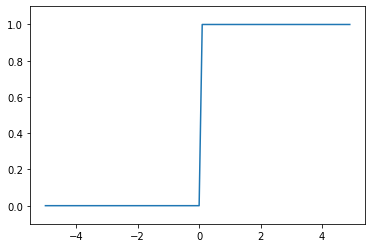

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

def step_function(x): #계단 모양이여서 step function이라함.
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) #-5에서 5까지 0.1씩 증가해봄
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축의 범위 지정
plt.show()

## 3.1 시그모이드 수식
* https://reniew.github.io/12/

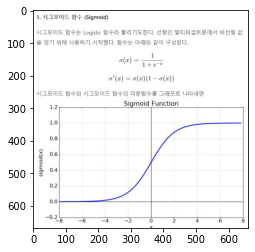

In [43]:
img = imread('../data/7.jpg')
plt.imshow(img)
plt.show()

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [45]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [46]:
t= np.array([1.0, 2.0, 3.0])
1.0+t

array([2., 3., 4.])

In [47]:
1.0/t

array([1.        , 0.5       , 0.33333333])

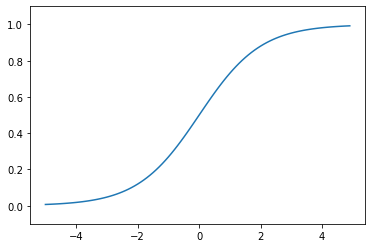

In [48]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

#### 시그모이드와  step_funtione 비교

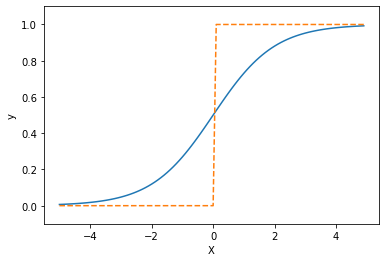

In [49]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, linestyle="--", label="step_function")
plt.xlabel("X") # x축 이름
plt.ylabel("y") # y축 이름
plt.ylim(-0.1, 1.1)
plt.show()

* 계단함수는 0을 경계로 출력이 갑자기 바뀜
* 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됨.
* 퍼셉트론에서는 뉴런 사이에 0혹은 1이 흘렀다면 시그모이드 함수(신경망)에서는 연속적인 실수가 흐름.(정보전달)
* 공통점: 입력이 작을 때는(중요하지 않으면) 출력은 0에 가깝고 커지면(중요하면) 출력이 1에 가까워짐. 출력은 0에서 1사이.

## 3.2 ReLU
ReLU(Rectified Linear Unit): 입력이 0을 넣으면 그 입력 그대로 출력. 0 이하면 0을 출력하는 함수.

In [50]:
def relu(x): #렐루
    return np.maximum(0, x)

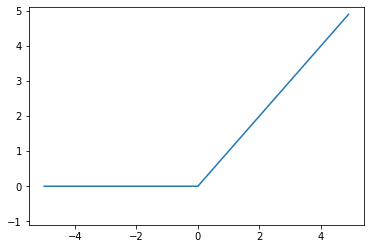

In [51]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

## 3.3 다차원 배열

넘파이의 다차원 배열 계산 설명, 신경망 구현

###  다차원 배열의 계산 

In [52]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A)) #ndim 차원:1차원
print(A.shape) # 튜플에 하나의 요소만 있으면 ,를 붙인다.(문법)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [53]:
#2차원 배열은 행렬(matrix)
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B)) #ndim 차원:2차원
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [54]:
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
print(np.dot(A,B))
np.dot(B,A)#행렬 곱
#A와 B는 2X2 행렬
#AXB와 BXA는 결과가 다르다.(피연산자의 순서가 다르면 행렬의 곱의 결과도 다르다.)

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


array([[23, 34],
       [31, 46]])

In [55]:
A = np.array([[1,2,3],[3,4,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
np.dot(A,B) 

(2, 3)
(3, 2)


array([[22, 28],
       [45, 58]])

In [56]:
# A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소(행 수)가 일치하지
# 않아 오류 발생
C = np.array([[1,2],[3,4]])
print(A.shape)
print(C.shape)

np.dot(A,C) #행렬의 열과 벡터의 행이 같아야 곱이 가능(다르게때문에 에러남)

(2, 3)
(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [57]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
np.dot(A,B)

(3, 2)
(2,)


array([23, 53, 83])

In [58]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X,W) #np.dot으로 신경망(행렬의 곱)을 쉽게 나타냄.
print(Y) 

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


### 3층 신경망 구현하기
* 입력(2개) -> 1층(3개) -> 2층(2개) ->출력층(2개)

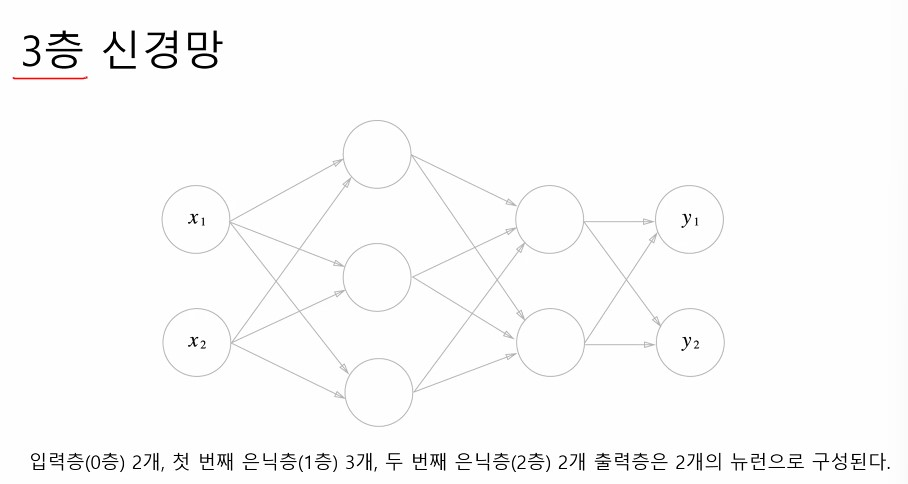

In [59]:
from IPython.display import Image 
Image("../data/8.jpg")

In [60]:
# 1층 3개짜리 구현하기(p.85)
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3]) #바이어스 값(편향값)

print(W1.shape) #(2,3)
print(B1.shape) #(3,)
print(X.shape) #(2,)

A1 = np.dot(X, W1) +B1

(2, 3)
(3,)
(2,)


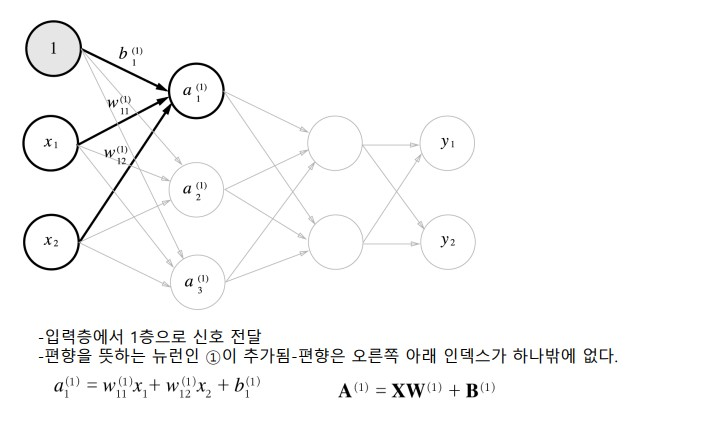

In [61]:
Image("../data/9.jpg")

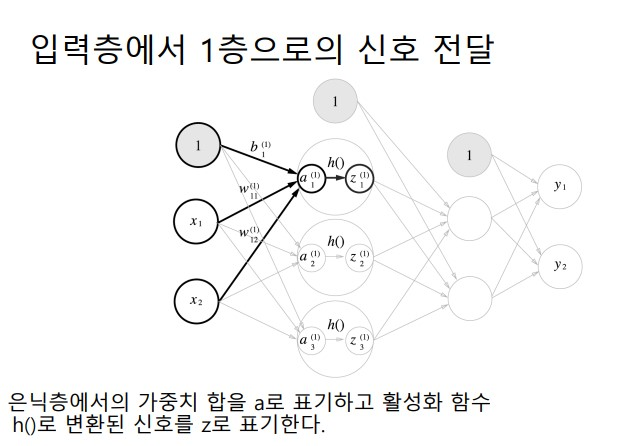

In [62]:
Image("../data/10.jpg")

In [63]:
# h()에다가 시그모이드를 쓴다.
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


#### 1층 끝나고 1층에서 2층으로 가는 과정

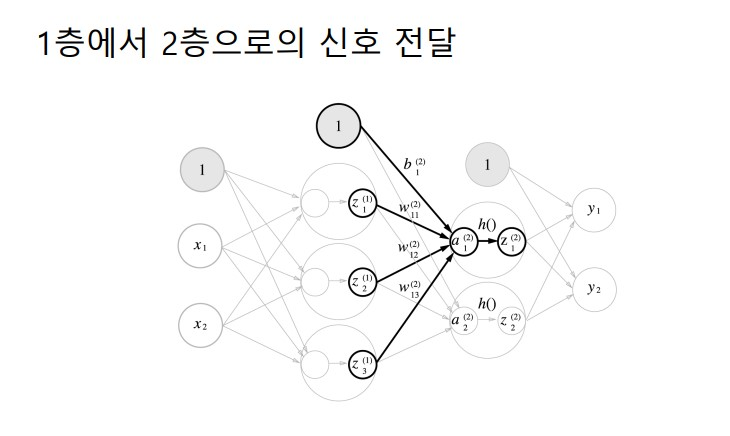

In [65]:
Image("../data/11.jpg")

In [67]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


#### 2층에서 출력층으로의 신호전달이다.
* 지금까지와 다르게 활성함수 h()와 항등함수(identity_function)를 활성화 함수를 이용한다.

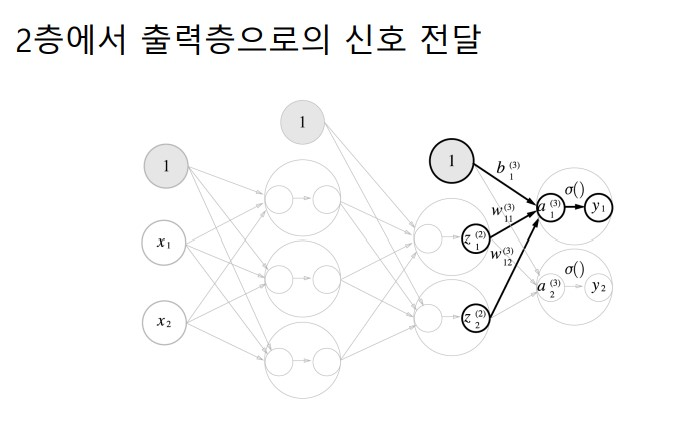

In [66]:
Image("../data/12.jpg")

* 항등함수

In [68]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

#### 3층 신경망 전체정리

In [69]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3]) 
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) #a1이 다음층으로 값 전달할때 sigmoid 씀
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3) #마지막 출력층할때 아까만든 항등함수 씀
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


* 출력층의 활성화 함순 풀고자 하는 문제의 성질에 맞게 정함<br>
회귀-> 항등함수, 2클래스 분류 -> 시그모이드함수, 다중클래스분류->소프트맥스 함수

## 3.5 출력층 설계하기(정보전달은 시그모이드와 렐루)
* 신경망은 분류, 회귀 모두 이용가능<br>
    * 일반적으로 회귀에는 항등함수(입력값 들어오면 그대로 출력)
    * 분류에는 소프트 맥스 함수를 사용
* 분류:어느 class에 속하는냐 문제
* 회귀:입력 데이터에서 연속적인 수치를 예측하는 문제

* 소프트맥스 함수 구현

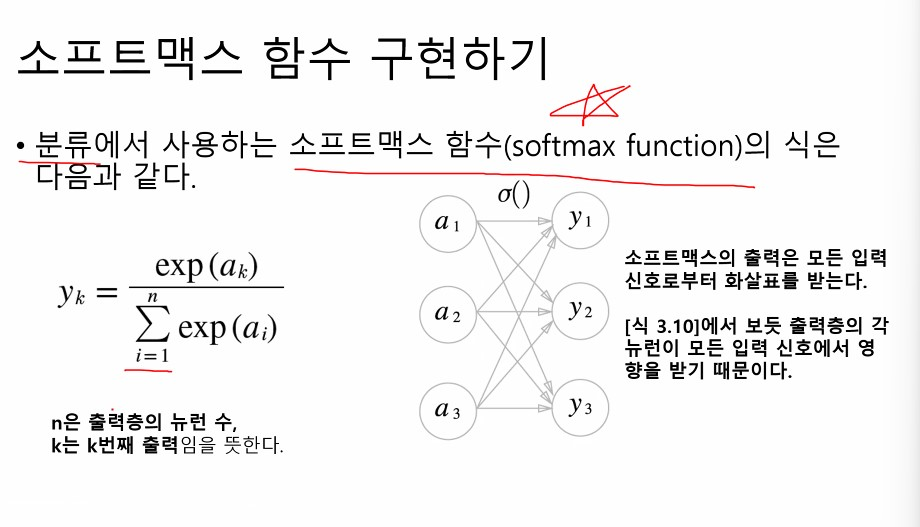

In [71]:
Image("../data/13.jpg")

In [73]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [75]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

* 소프트 맥스 함수 구현시 주의점<br>
    * 오버플로우 문제이다.(지수크게주면 무한대로 나온다.)<br>
    * 아래와 같이 개선이 필요하다.

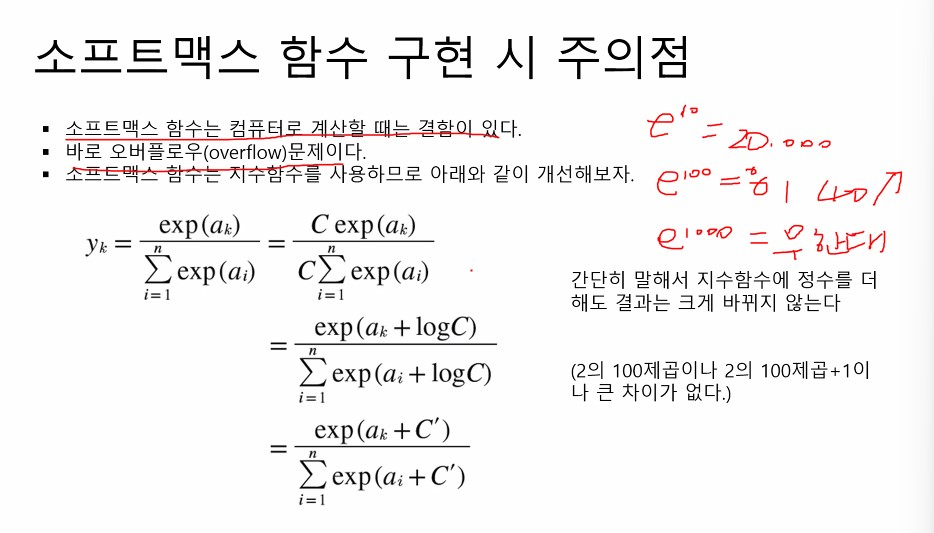

In [77]:
Image("../data/14.jpg")

In [76]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #오버플로우 되어 제대로 계산되지 않는다.

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_33156/832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_33156/832863605.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [78]:
# 오버플로우를 막을 목적으로 입력 신호 중 최대값을 이용(분자 분모 최대값빼줌)
c = np.max(a)  #--->c=1010
a - c #1010-1010, 1000-1010, 990-1010

array([  0, -10, -20])

In [79]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [80]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [81]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y) #처음 지수함수 값과 동일하다.(출력의 총합은 1이 되야 한다!!)
# 출력값중 가장 높은 값을 정답이라고 한다.
# (여기서는 4.0일때 0.73659691이 정답이다)

[0.01821127 0.24519181 0.73659691]


1.0

* y값을 보면 소프트 맥스의 출력은 0~1사이이다.
* 소프트맥스의 출력 총합은 1이다.
* 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다.
* 이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할수 있다.

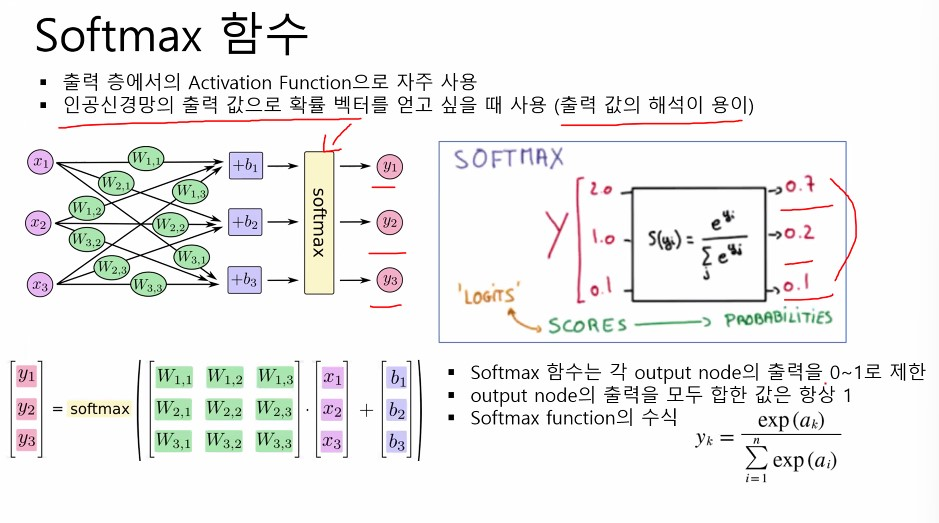

In [82]:
Image("../data/15.jpg")

* 확률값이 가장 높은 0.7이 정답!!!

## 3.6 손글씨 숫자 인식

* 참조 사이트 :http://neuralnetworksanddeeplearning.com/chap1.html
* 참조 사이트 :https://ml4a.github.io/ml4a/neural_networks/

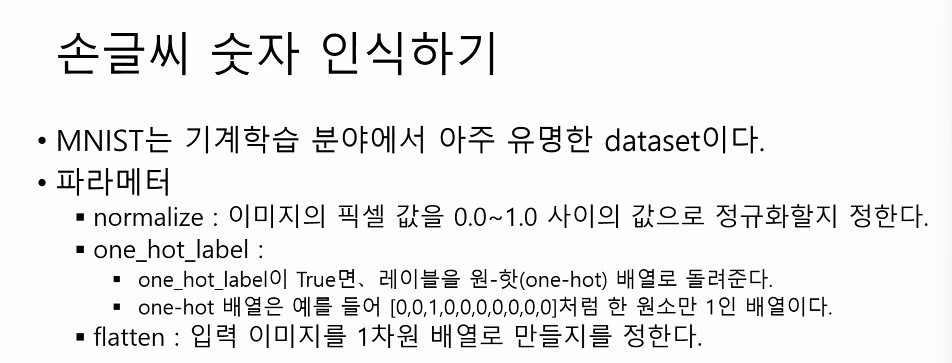

In [85]:
Image("../data/16.jpg")

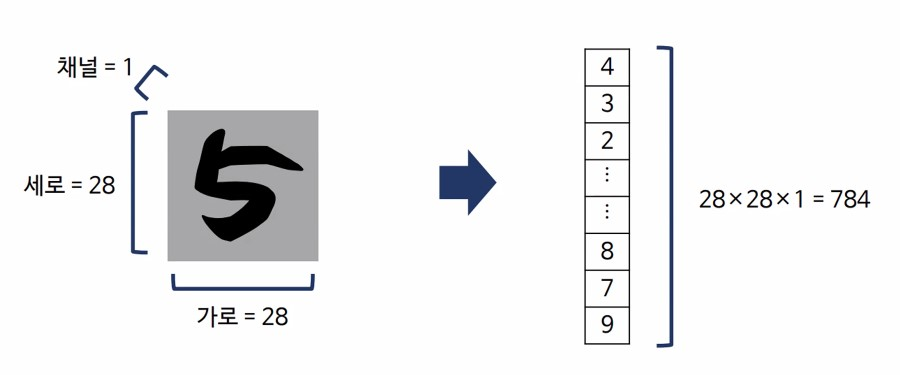

In [86]:
Image("../data/17.jpg")

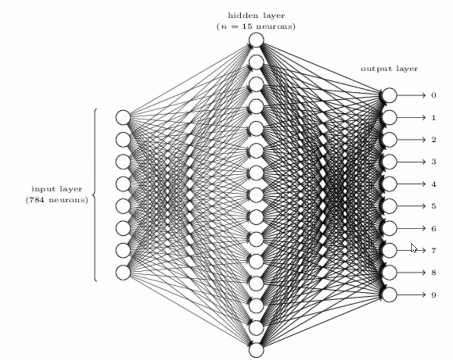

In [87]:
Image("../data/18.jpg")

* 출력은 0아니면 9로 나와야한다.

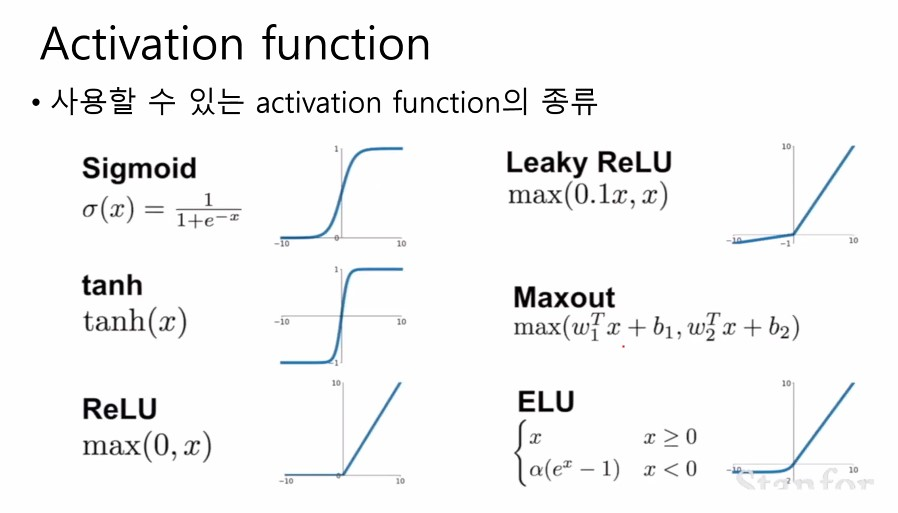

In [89]:
Image("../data/20.jpg")

* 구현되려면
실행파일이 있는 곳에 <br>
C:\Users\본인폴더\anaconda3\DataScience\Source 폴더에 <br>
실행파일이 있는 곳에<br> 
sample_weight.pkl과 <br>
dataset 폴더 common 폴더가 있어야 합니다.


In [96]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(np.array(pil_img))
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

In [97]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [98]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [99]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [100]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
